In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [50]:
path = "data/clean/adult_cleaned_3.csv"
data = pd.read_csv(path)

# use to test and display first couple of rows from loaded data
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


['<=50K' '>50K']
['<=50K' '>50K']


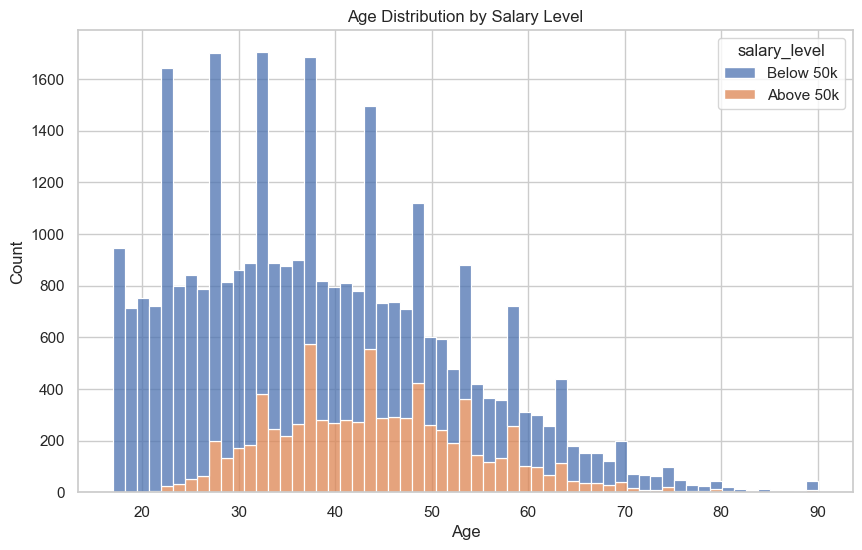

In [43]:
# Categorize salary into above and below $50,000 analyze via age
print(data['income'].unique())
income_mapping = {'<=50K': 'Below 50k', '>50K': 'Above 50k'}
data['salary_level'] = data['income'].map(income_mapping)
print(data['income'].unique())

plt.figure(figsize=(10, 6))
sns.histplot(data, x='age', hue='salary_level', multiple='stack')
plt.title('Age Distribution by Salary Level')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

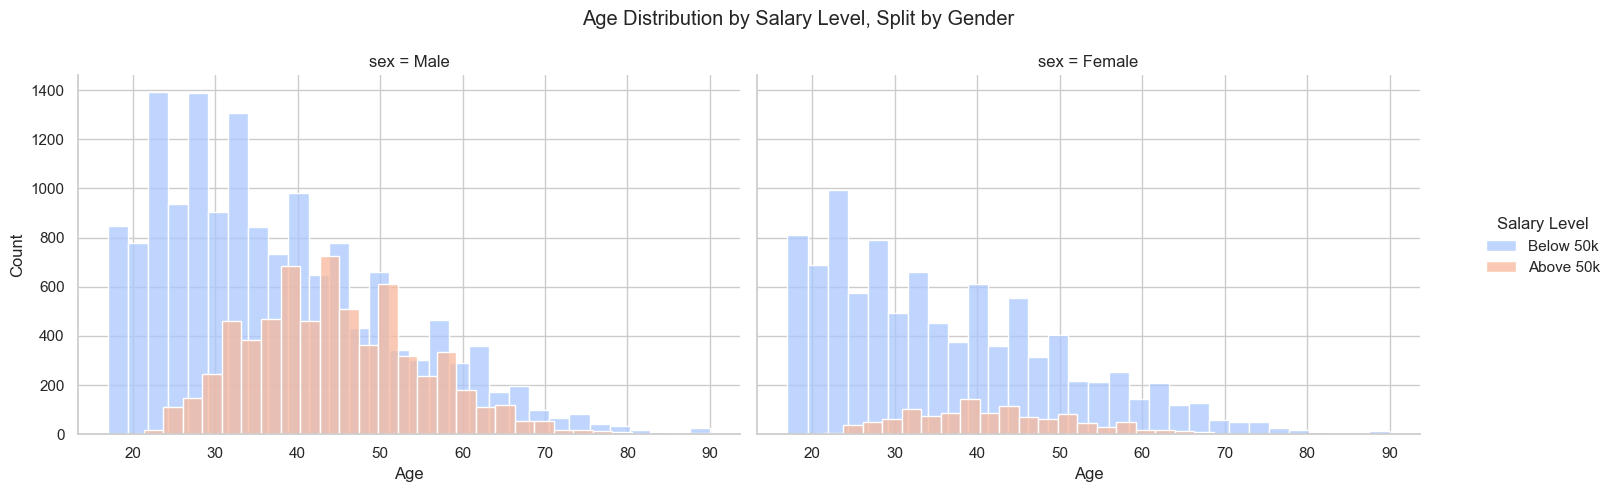

In [45]:
income_mapping = {'<=50K': 'Below 50k', '>50K': 'Above 50k'}
data.loc[:, 'salary_level'] = data['income'].map(income_mapping)

# Create separate histograms for males and females to better visualize the distrbution for age v salary 
g = sns.FacetGrid(data, col="sex", hue="salary_level", height=5, aspect=1.5, palette='coolwarm', margin_titles=True)
g.map(sns.histplot, 'age', multiple='stack', bins=30)
g.add_legend(title="Salary Level")
g.set_axis_labels("Age", "Count")
g.set_titles("Gender: {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age Distribution by Salary Level, Split by Gender')
plt.show()

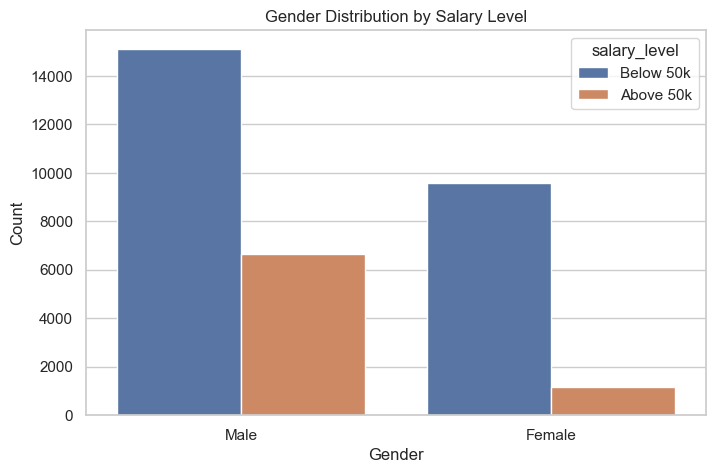

In [46]:
# identify gender distribution by salary level
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sex', hue='salary_level')
plt.title('Gender Distribution by Salary Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


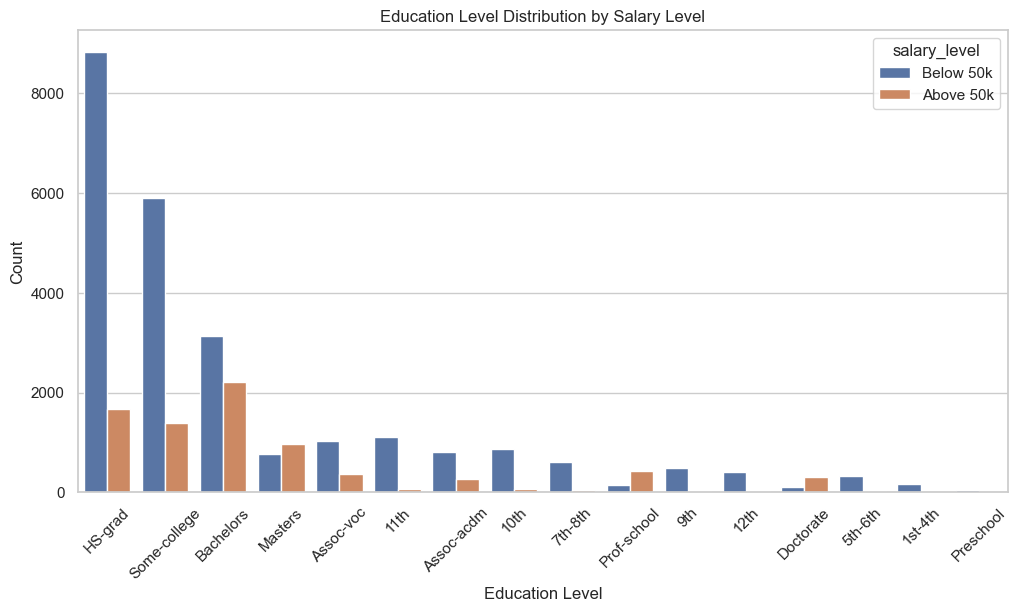

In [11]:
# identify education level distribution trends for salary level
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='education', hue='salary_level', order=data['education'].value_counts().index)
plt.title('Education Level Distribution by Salary Level')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

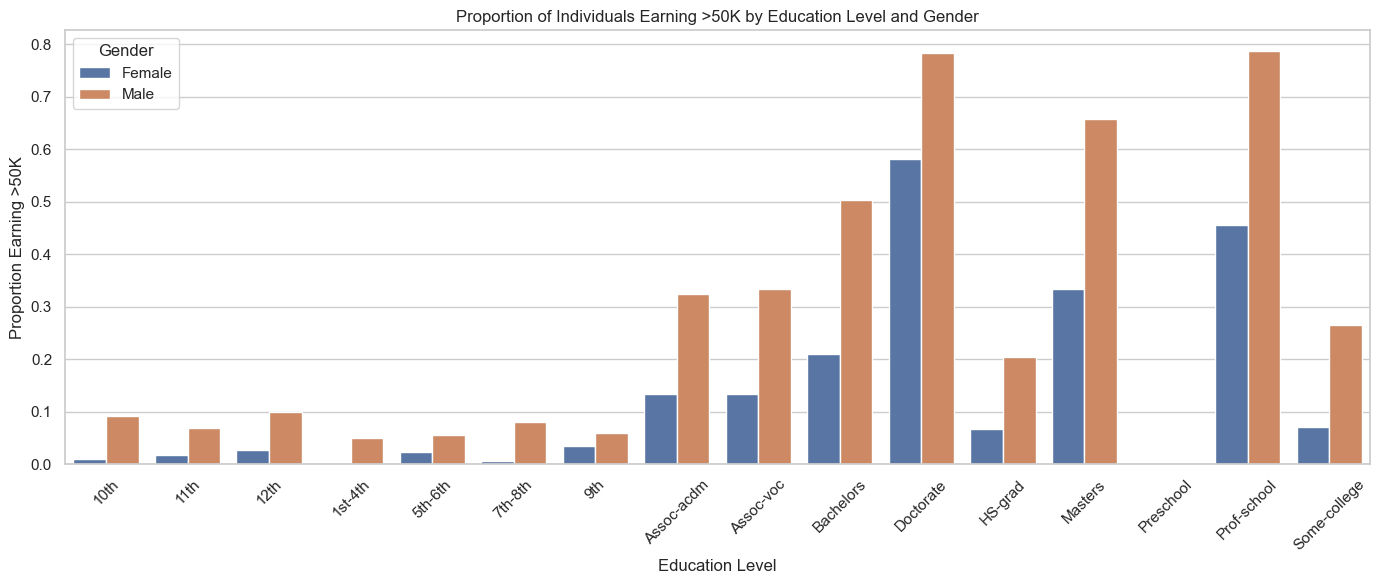

In [82]:
data['income_binary'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
education_gender_income = data.groupby(['education', 'sex'])['income_binary'].mean().reset_index()


plt.figure(figsize=(14, 6))
sns.barplot(x='education', y='income_binary', hue='sex', data=education_gender_income)
plt.title('Proportion of Individuals Earning >50K by Education Level and Gender')
plt.xlabel('Education Level')
plt.ylabel('Proportion Earning >50K')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

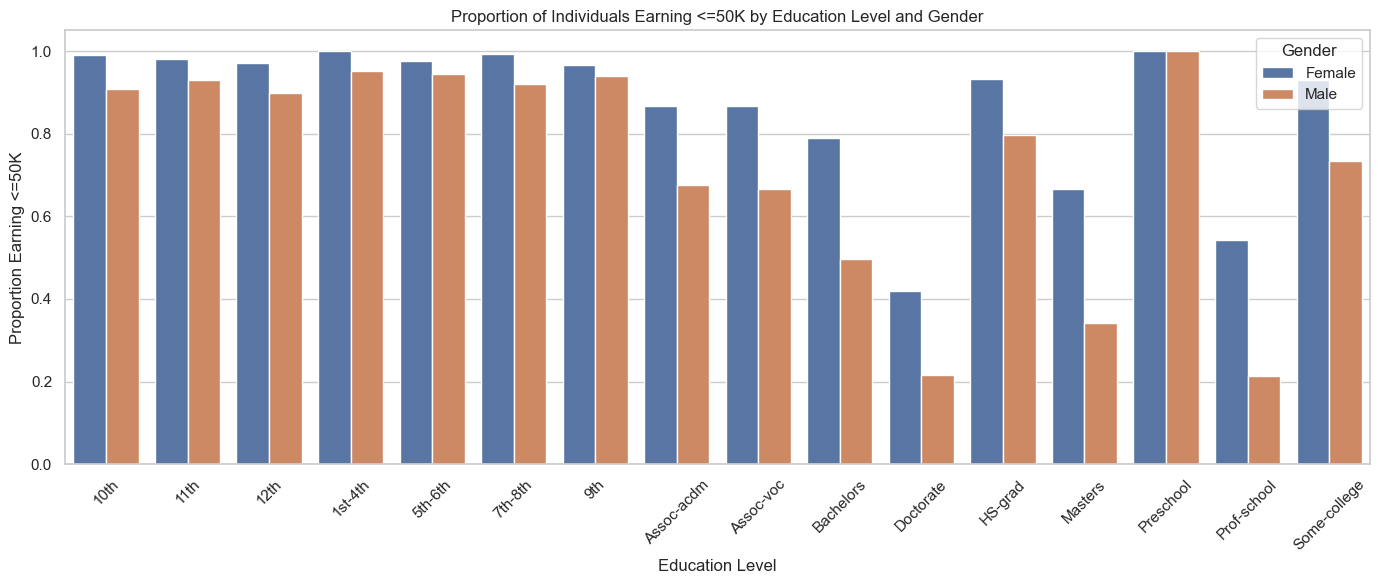

In [84]:
data['income_binary'] = data['income'].apply(lambda x: 1 if x == '<=50K' else 0)
education_gender_income = data.groupby(['education', 'sex'])['income_binary'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='education', y='income_binary', hue='sex', data=education_gender_income)
plt.title('Proportion of Individuals Earning <=50K by Education Level and Gender')
plt.xlabel('Education Level')
plt.ylabel('Proportion Earning <=50K')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

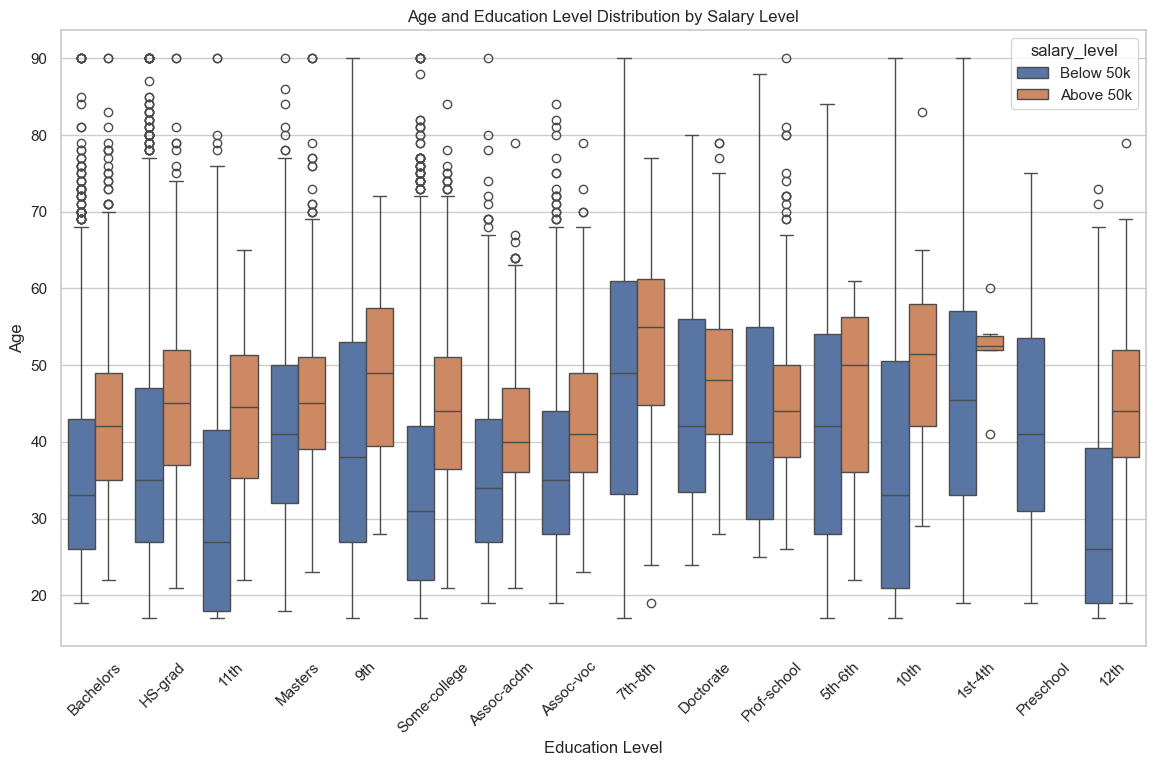

In [12]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='education', y='age', hue='salary_level')
plt.title('Age and Education Level Distribution by Salary Level')
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

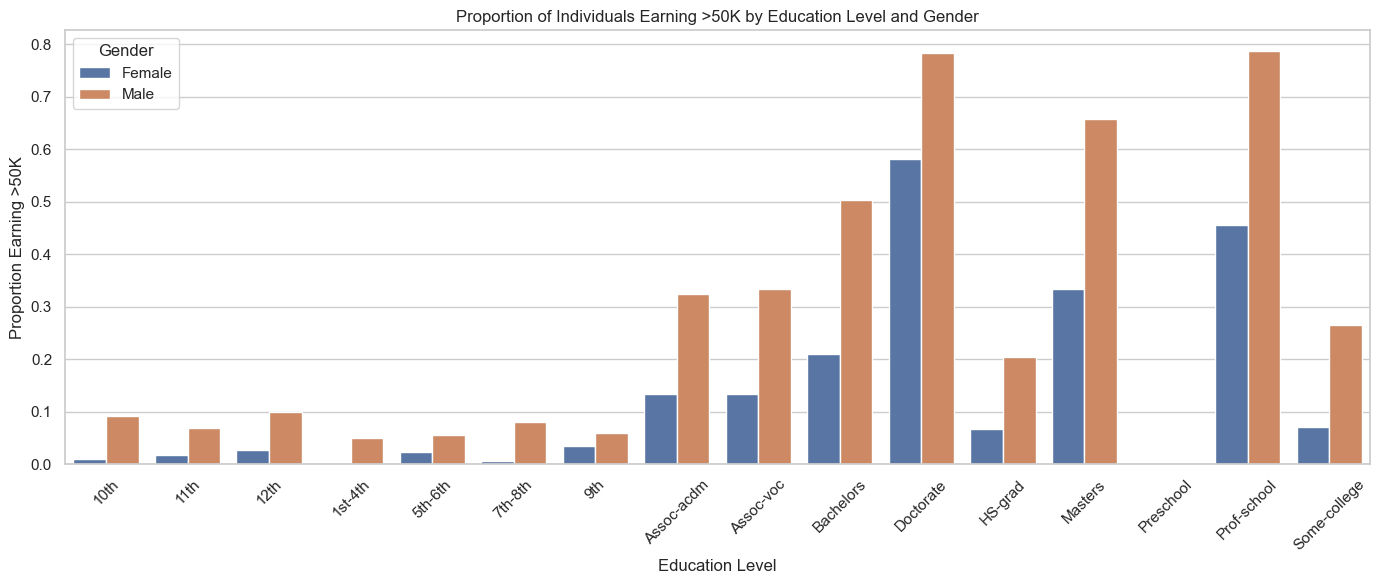

<Figure size 2500x2500 with 0 Axes>

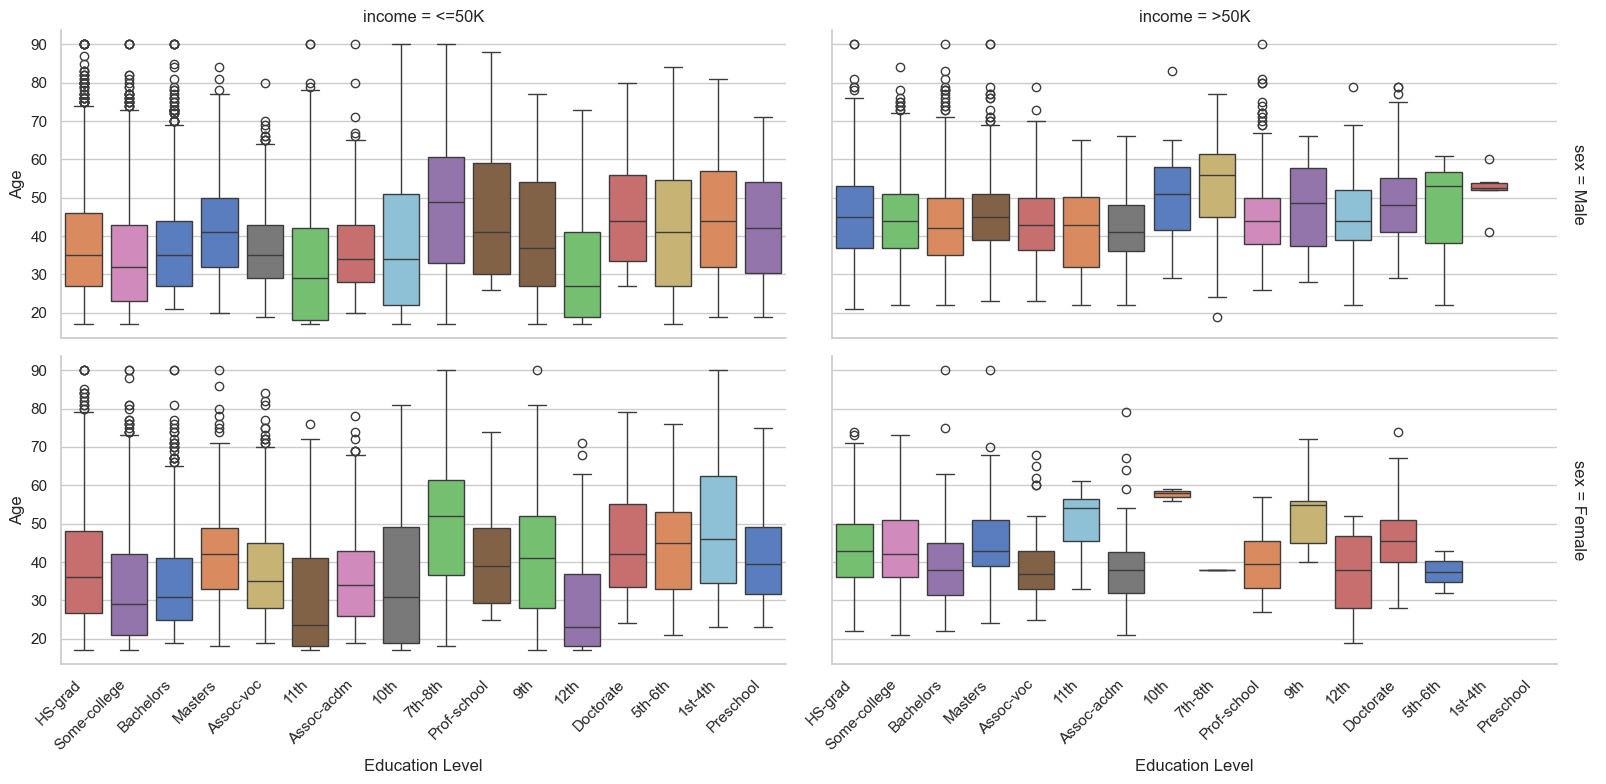